In [134]:
import os

import pandas as pd


In [135]:
DO_FILL_NA = True

In [136]:
RESULTS_MODEL_FOLDER = r"D:\OneDrive - fpts.com.vn\DucNN privates\Files\Codes\Khoa học dữ liệu\Luận văn tốt nghiệp Thạc sĩ Khoa học dữ liệu\QuantNet\Results_model"
RESULTS_BASELINE_FOLDER = r"D:\OneDrive - fpts.com.vn\DucNN privates\Files\Codes\Khoa học dữ liệu\Luận văn tốt nghiệp Thạc sĩ Khoa học dữ liệu\QuantNet\Results"

In [137]:
def get_results_summary(RESULTS_MODEL_FOLDER, mode="models"):
    results_summary = pd.DataFrame(
        columns=[
            "region",
            "transferstrat",
            "non_zero_count",
            "valperiod",
            "testperiod",
            "tsteps",
            "tksteps",
            "average_sharpe_ratio",
            "average_calmar_ratio",
            "average_maximum_draw_down",
            "average_annual_return",
            "average_volatility",
            "average_sortino_ratio",
            "average_down_risk",
            "average_value_at_risk",
            "average_tail_risk",
            "average_skew",
            "average_kurtosis",
        ]
    )
    csv_files = [f for f in os.listdir(RESULTS_MODEL_FOLDER) if f.endswith(".csv")]
    csv_files
    for i in range(len(csv_files)):
        file_name = csv_files[i]
        df = pd.read_csv(f"{RESULTS_MODEL_FOLDER}/{file_name}")
        if DO_FILL_NA:
            df = df.fillna(0)
        else:
            df = df[df["ANN_RET"] != 0]

        # Parse the file name to extract the relevant fields
        text = file_name.split("_")
        region = text[0]
        non_zero_count = len(df)
        valperiod = text[2]
        testperiod = text[4]
        if mode == "models":
            tsteps = text[6]
            tksteps = text[8]
            transferstrat = (
                f"{tsteps}_{file_name.split('_transferstrat_')[1].split('_lr')[0]}"
            )
        elif mode == "baseline":
            transferstrat = file_name.split("_baseline_")[1].split(".csv")[0]
            tsteps = None
            tksteps = None
        else:
            raise ValueError(f"Invalid mode: {mode}")
        df_test = df[df["set"] == "test"]
        average_sharpe_ratio = df_test["SR"].mean()
        average_calmar_ratio = df_test["CR"].mean()
        average_maximum_draw_down = df_test["MDD"].mean()
        average_annual_return = df_test["ANN_RET"].mean()
        average_volatility = df_test["ANN_VOL"].mean()
        average_sortino_ratio = df_test["SortR"].mean()
        average_down_risk = df_test["DownRisk"].mean()
        average_value_at_risk = df_test["VaR"].mean()
        average_tail_risk = df_test["TailR"].mean()
        average_skew = df_test["Skew"].mean()
        average_kurtosis = df_test["Kurt"].mean()

        # Create a pandas Series with the extracted values
        meta_series = pd.Series(
            [
                region,
                transferstrat,
                non_zero_count,
                valperiod,
                testperiod,
                tsteps,
                tksteps,
                average_sharpe_ratio,
                average_calmar_ratio,
                average_maximum_draw_down,
                average_annual_return,
                average_volatility,
                average_sortino_ratio,
                average_down_risk,
                average_value_at_risk,
                average_tail_risk,
                average_skew,
                average_kurtosis,
            ],
            index=[
                "region",
                "transferstrat",
                "non_zero_count",
                "valperiod",
                "testperiod",
                "tsteps",
                "tksteps",
                "average_sharpe_ratio",
                "average_calmar_ratio",
                "average_maximum_draw_down",
                "average_annual_return",
                "average_volatility",
                "average_sortino_ratio",
                "average_down_risk",
                "average_value_at_risk",
                "average_tail_risk",
                "average_skew",
                "average_kurtosis",
            ],
        )

        # Append the Series as a new row to the results DataFrame
        results_summary = pd.concat(
            [results_summary, meta_series.to_frame().T], ignore_index=True
        )

    return results_summary

In [138]:
def get_results_grouped(results_summary):
    # Convert all columns except 'region' and 'transferstrat' to numeric
    cols_to_convert = [
        col for col in results_summary.columns if col not in ["region", "transferstrat"]
    ]
    cols_to_convert

    results_summary[cols_to_convert] = results_summary[cols_to_convert].apply(
        pd.to_numeric, errors="coerce"
    )
    results_summary_grouped = results_summary.groupby("transferstrat").mean(
        numeric_only=True
    )
    results_summary_grouped = results_summary_grouped.drop(
        columns=["valperiod", "testperiod", "tsteps", "tksteps"]
    )
    return results_summary_grouped

In [139]:
results_summary_models = get_results_summary(RESULTS_MODEL_FOLDER)
results_summary_models

,region,transferstrat,non_zero_count,valperiod,testperiod,tsteps,tksteps,average_sharpe_ratio,average_calmar_ratio,average_maximum_draw_down,average_annual_return,average_volatility,average_sortino_ratio,average_down_risk,average_value_at_risk,average_tail_risk,average_skew,average_kurtosis
0,Americas,1000_global_linear_linear,3045,0,756,1000,0,-0.101629,-0.006249,-0.482689,-0.053714,0.313453,-0.09233,0.220728,-0.031768,0.985273,0.130796,16.377196
1,Americas,1000_global_linear_lstm,3045,0,756,1000,0,0.217888,0.279788,-0.159673,0.030851,0.10718,0.367922,0.07493,-0.010047,1.051022,-0.196955,23.456196
2,Americas,1000_global_lstm_linear,3045,0,756,1000,0,0.2445,0.274472,-0.125566,0.024097,0.087012,0.423623,0.059515,-0.007409,1.082012,0.108796,30.677008
3,Americas,1000_global_lstm_lstm,3045,0,756,1000,0,0.17429,0.206376,-0.192877,0.023766,0.127997,0.293298,0.088051,-0.013297,1.020792,0.317431,16.041915
4,Americas,1000_no_transfer_linear,3045,0,756,1000,0,-0.071531,0.116193,-0.01219,0.000285,0.006081,0.001081,0.004238,-0.0005,0.985653,-0.150128,33.338286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,MEA,500_global_linear_lstm,933,0,756,500,0,0.492639,0.728585,-0.132538,0.060151,0.099402,0.90838,0.065187,-0.008034,1.211832,0.448467,23.790762
92,MEA,500_global_lstm_linear,933,0,756,500,0,0.44487,0.681026,-0.129458,0.055195,0.091184,0.800996,0.060297,-0.007681,1.168529,0.351099,20.208769
93,MEA,500_global_lstm_lstm,933,0,756,500,0,0.16116,0.187699,-0.188822,0.018543,0.120504,0.281303,0.081923,-0.011702,1.060016,0.327277,12.841301
94,MEA,500_no_transfer_linear,933,0,756,500,0,0.30084,0.545195,-0.010735,0.003212,0.006868,0.739369,0.00442,-0.000454,1.141454,0.565488,41.975886


In [140]:
results_summary_baseline = get_results_summary(RESULTS_BASELINE_FOLDER, mode="baseline")
results_summary_baseline

,region,transferstrat,non_zero_count,valperiod,testperiod,tsteps,tksteps,average_sharpe_ratio,average_calmar_ratio,average_maximum_draw_down,average_annual_return,average_volatility,average_sortino_ratio,average_down_risk,average_value_at_risk,average_tail_risk,average_skew,average_kurtosis
0,Americas,buy_and_hold,3045,0,756,None,None,0.082648,0.165038,-0.414233,0.02151,0.320311,0.305422,0.218721,-0.031969,1.019992,0.330703,16.015522
1,Americas,csec_mom,3045,0,756,None,None,0.159705,0.221951,-0.001023,-0.000028,0.000507,0.322013,0.000347,-0.000042,1.009185,0.815161,28.107605
2,Americas,risk_parity,3045,0,756,None,None,0.023109,0.032243,-0.000401,0.001292,0.000552,0.037946,0.000321,-0.000047,0.012993,0.010674,0.10473
3,Americas,ts_mom,3045,0,756,None,None,0.159474,0.217724,-0.001105,-0.000039,0.000528,0.307317,0.000364,-0.000044,1.008582,0.594588,23.071613
4,Asia and Pacific,buy_and_hold,3165,0,756,None,None,0.051864,0.148624,-0.41835,0.011479,0.310685,0.26937,0.205515,-0.029242,1.040065,0.59505,12.890531
5,Asia and Pacific,csec_mom,3165,0,756,None,None,0.188535,0.260758,-0.000939,0.000013,0.000468,0.365249,0.000328,-0.000034,1.044838,0.564119,33.161367
6,Asia and Pacific,risk_parity,3165,0,756,None,None,-0.008695,0.045536,-0.003941,0.000163,0.002151,0.014291,0.001465,-0.00014,0.442937,0.103113,7.629067
7,Asia and Pacific,ts_mom,3165,0,756,None,None,0.166982,0.228471,-0.000986,0.000012,0.00049,0.305444,0.000346,-0.000036,1.039472,0.306753,23.87182
8,Europe,buy_and_hold,1707,0,756,None,None,0.281237,0.406174,-0.402808,0.117814,0.353087,0.649616,0.219645,-0.029298,1.049673,-0.072954,25.666133
9,Europe,csec_mom,1707,0,756,None,None,0.074026,0.212852,-0.001596,-0.000181,0.000664,0.229124,0.000474,-0.000044,1.007785,0.74423,35.101808


In [141]:
results_summary_models_grouped = get_results_grouped(results_summary_models)
results_summary_models_grouped

,non_zero_count,average_sharpe_ratio,average_calmar_ratio,average_maximum_draw_down,average_annual_return,average_volatility,average_sortino_ratio,average_down_risk,average_value_at_risk,average_tail_risk,average_skew,average_kurtosis
transferstrat,,,,,,,,,,,,
1000_global_linear_linear,2212.5,0.170856,0.277225,-0.419514,0.036175,0.304022,0.336716,0.205852,-0.028330,1.041795,0.181831,17.407433
1000_global_linear_lstm,2212.5,0.357383,0.452747,-0.166332,0.045979,0.113734,0.627825,0.077521,-0.009891,1.098516,0.095361,24.479196
1000_global_lstm_linear,2212.5,0.302436,0.442598,-0.134453,0.033103,0.090284,0.594182,0.060567,-0.007317,1.094079,0.230263,33.618744
1000_global_lstm_lstm,2212.5,0.186056,0.236020,-0.188262,0.026057,0.125901,0.338437,0.084389,-0.012402,1.042099,0.284230,17.096867
1000_no_transfer_linear,2212.5,0.140946,0.309391,-0.010509,0.001307,0.005968,0.367301,0.003993,-0.000415,1.063061,0.314870,43.973577
1000_no_transfer_lstm,2212.5,0.187294,0.292803,-0.135570,0.012035,0.083321,0.369350,0.057967,-0.007597,1.073856,0.131776,28.243050
100_global_linear_linear,2212.5,0.143541,0.290624,-0.389411,0.028162,0.269619,0.315778,0.182775,-0.024851,1.038185,0.105230,18.408015
100_global_linear_lstm,2212.5,0.258322,0.383420,-0.219796,0.038487,0.150039,0.492007,0.100123,-0.014026,1.066411,0.261182,20.852682
100_global_lstm_linear,2212.5,0.317980,0.465829,-0.246128,0.059159,0.174595,0.582445,0.114763,-0.015923,1.084178,0.262622,18.964479


In [142]:
results_summary_baseline_grouped = get_results_grouped(
    results_summary=results_summary_baseline
)
results_summary_baseline_grouped

,non_zero_count,average_sharpe_ratio,average_calmar_ratio,average_maximum_draw_down,average_annual_return,average_volatility,average_sortino_ratio,average_down_risk,average_value_at_risk,average_tail_risk,average_skew,average_kurtosis
transferstrat,,,,,,,,,,,,
buy_and_hold,2212.5,0.128950,0.223528,-0.405971,0.046320,0.316337,0.387051,0.208224,-0.029359,1.046758,0.305938,16.836102
csec_mom,2212.5,0.134329,0.231705,-0.001111,-0.000058,0.000508,0.298098,0.000357,-0.000037,1.015990,0.775046,33.324353
risk_parity,2212.5,0.044889,0.082962,-0.006711,0.000953,0.003959,0.121101,0.002774,-0.000199,0.472311,-0.039144,14.026114
ts_mom,2212.5,0.113498,0.206464,-0.001223,-0.000082,0.000540,0.242147,0.000381,-0.000041,1.014978,0.511031,24.758543


In [143]:
results_grouped = pd.concat(
    [results_summary_models_grouped, results_summary_baseline_grouped]
)
results_grouped

,non_zero_count,average_sharpe_ratio,average_calmar_ratio,average_maximum_draw_down,average_annual_return,average_volatility,average_sortino_ratio,average_down_risk,average_value_at_risk,average_tail_risk,average_skew,average_kurtosis
transferstrat,,,,,,,,,,,,
1000_global_linear_linear,2212.5,0.170856,0.277225,-0.419514,0.036175,0.304022,0.336716,0.205852,-0.028330,1.041795,0.181831,17.407433
1000_global_linear_lstm,2212.5,0.357383,0.452747,-0.166332,0.045979,0.113734,0.627825,0.077521,-0.009891,1.098516,0.095361,24.479196
1000_global_lstm_linear,2212.5,0.302436,0.442598,-0.134453,0.033103,0.090284,0.594182,0.060567,-0.007317,1.094079,0.230263,33.618744
1000_global_lstm_lstm,2212.5,0.186056,0.236020,-0.188262,0.026057,0.125901,0.338437,0.084389,-0.012402,1.042099,0.284230,17.096867
1000_no_transfer_linear,2212.5,0.140946,0.309391,-0.010509,0.001307,0.005968,0.367301,0.003993,-0.000415,1.063061,0.314870,43.973577
1000_no_transfer_lstm,2212.5,0.187294,0.292803,-0.135570,0.012035,0.083321,0.369350,0.057967,-0.007597,1.073856,0.131776,28.243050
100_global_linear_linear,2212.5,0.143541,0.290624,-0.389411,0.028162,0.269619,0.315778,0.182775,-0.024851,1.038185,0.105230,18.408015
100_global_linear_lstm,2212.5,0.258322,0.383420,-0.219796,0.038487,0.150039,0.492007,0.100123,-0.014026,1.066411,0.261182,20.852682
100_global_lstm_linear,2212.5,0.317980,0.465829,-0.246128,0.059159,0.174595,0.582445,0.114763,-0.015923,1.084178,0.262622,18.964479


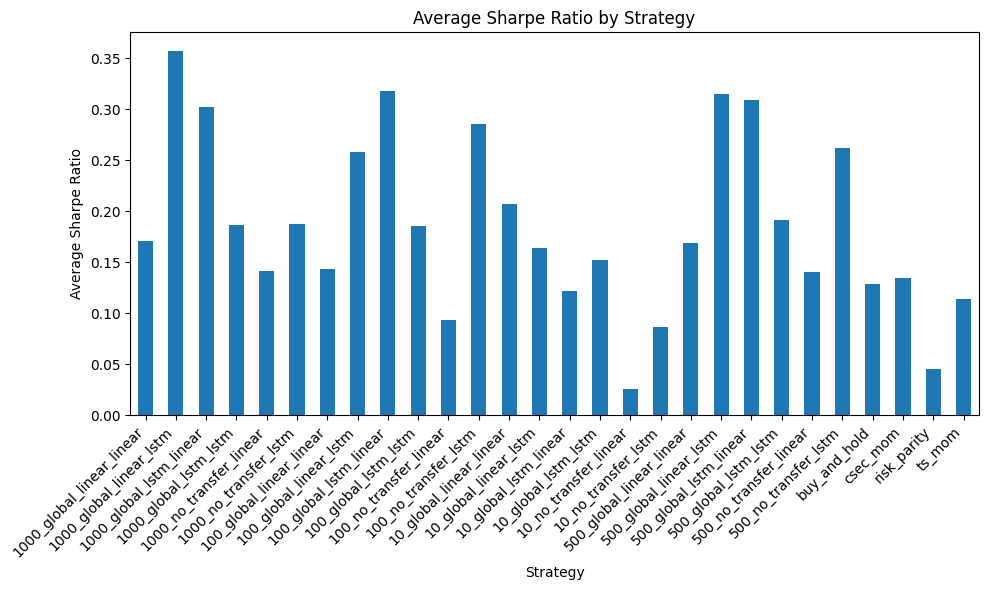

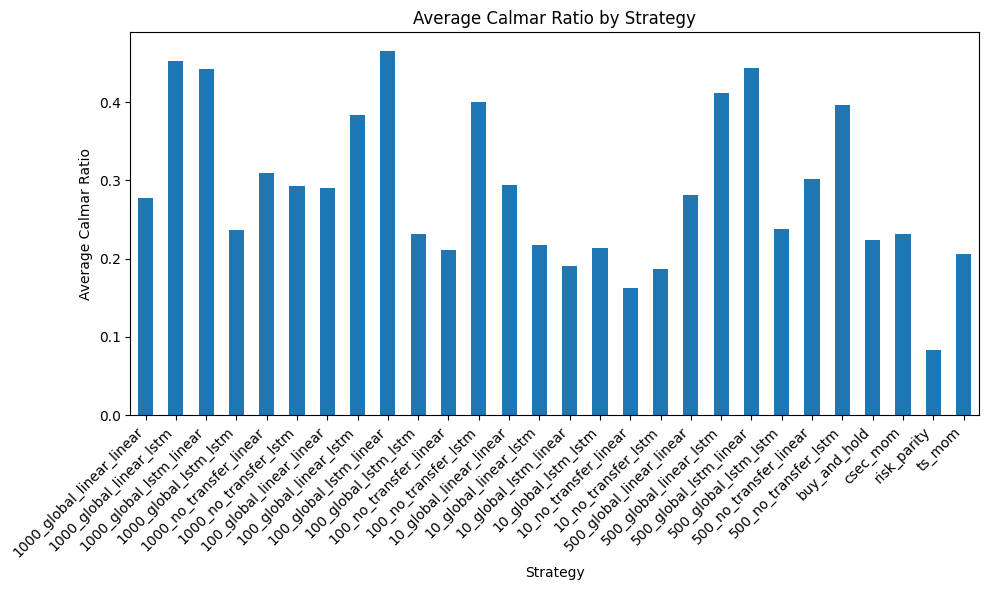

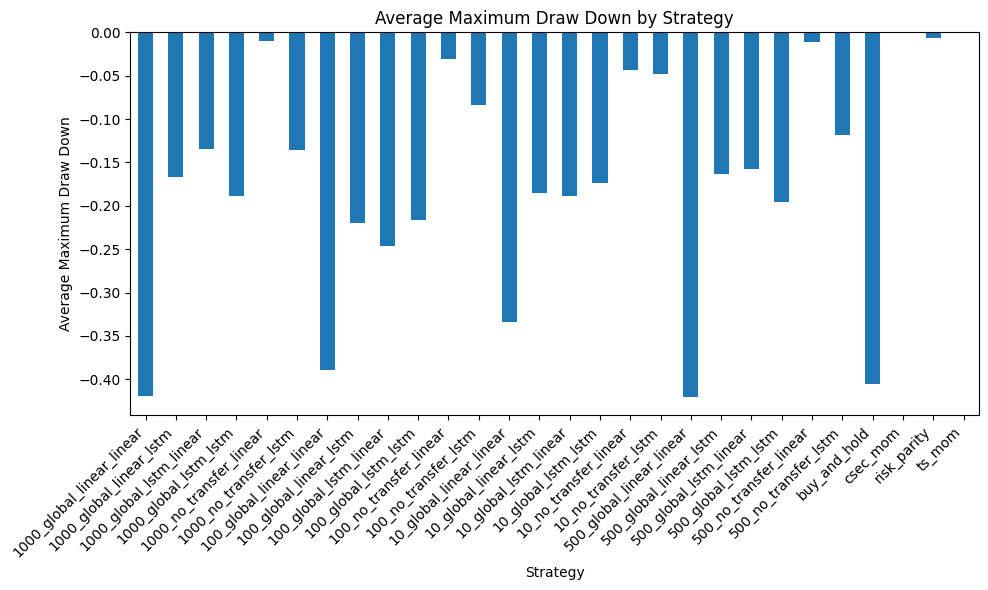

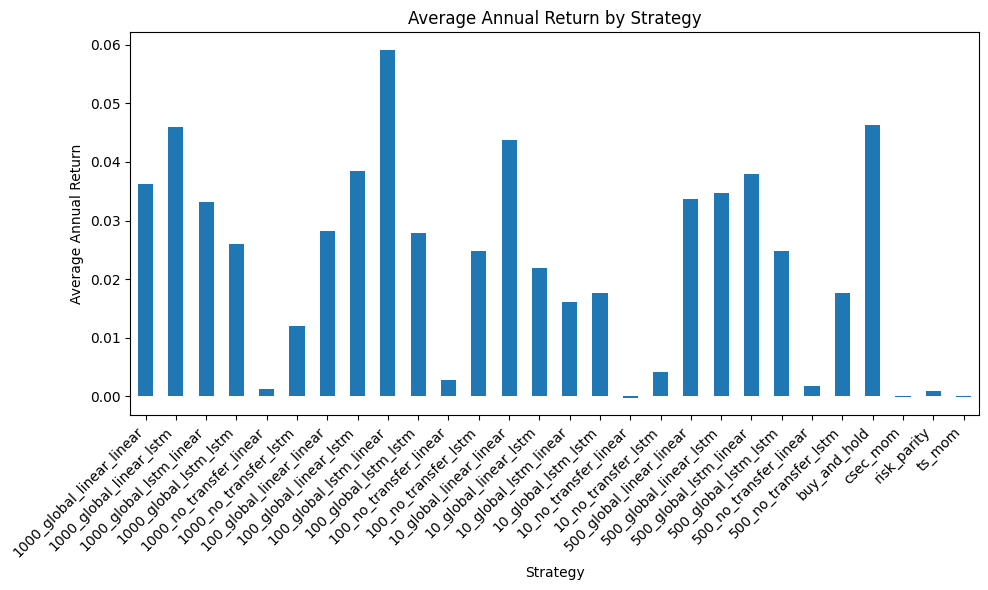

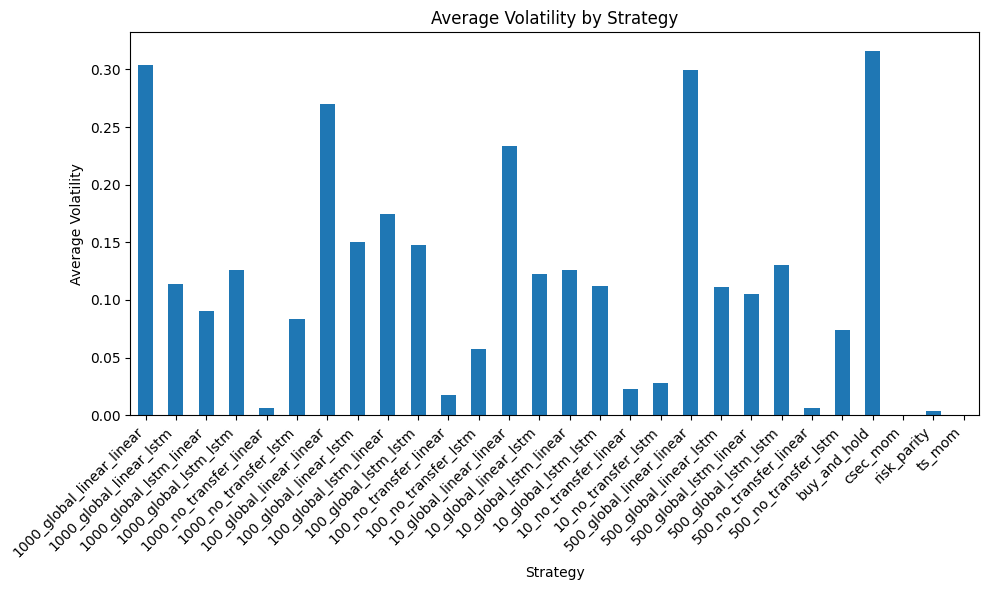

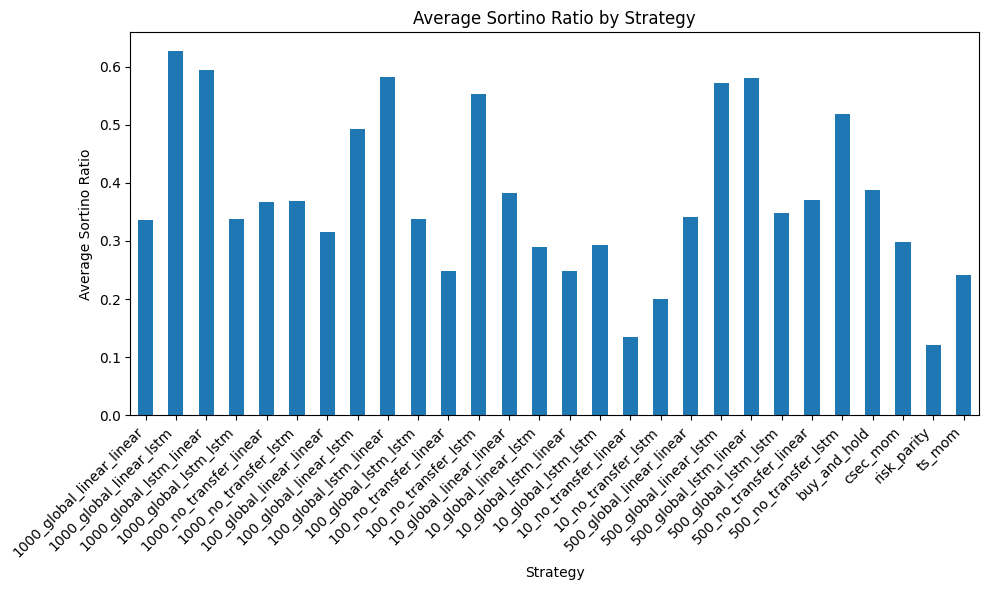

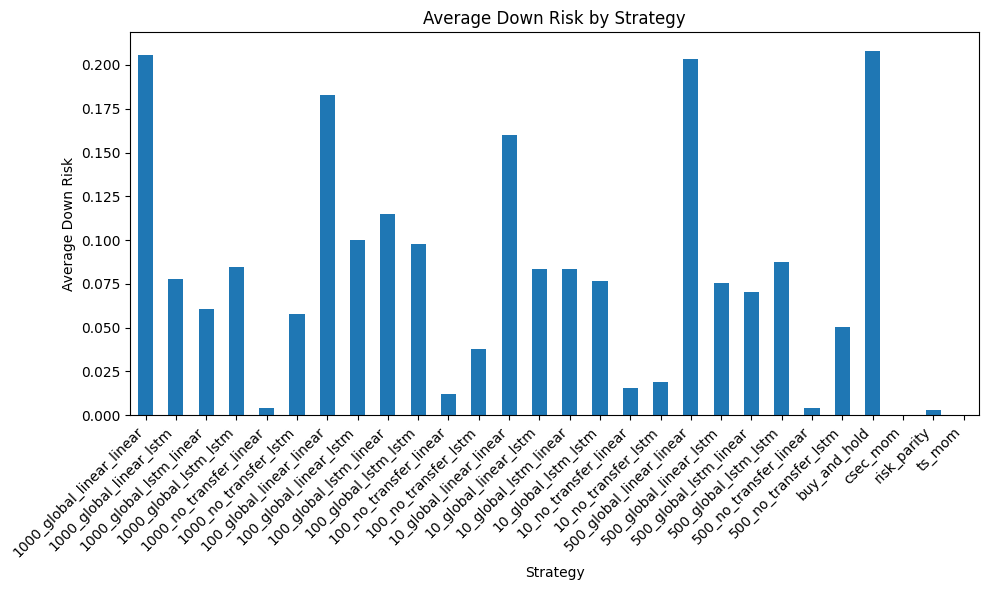

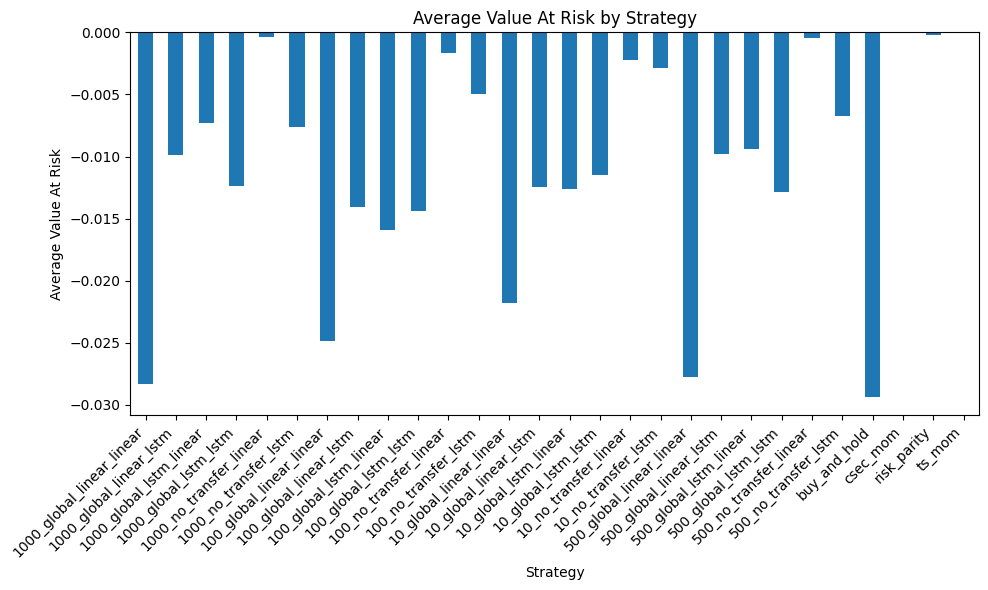

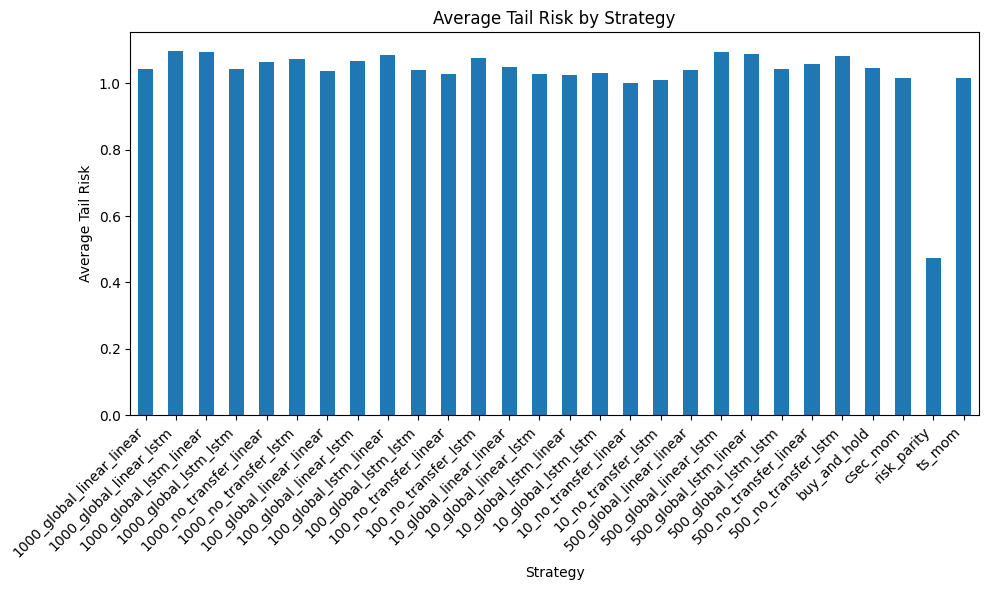

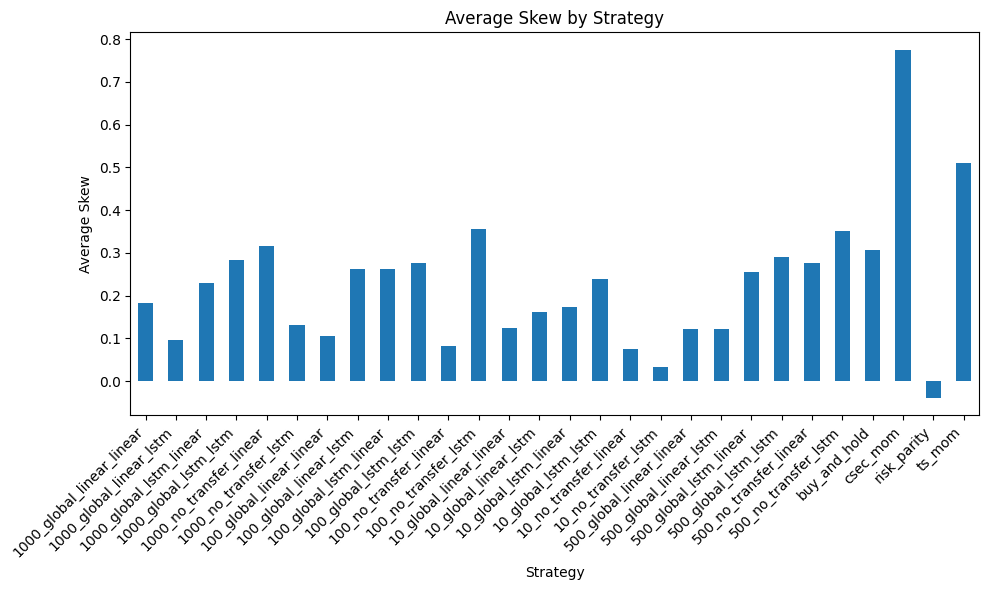

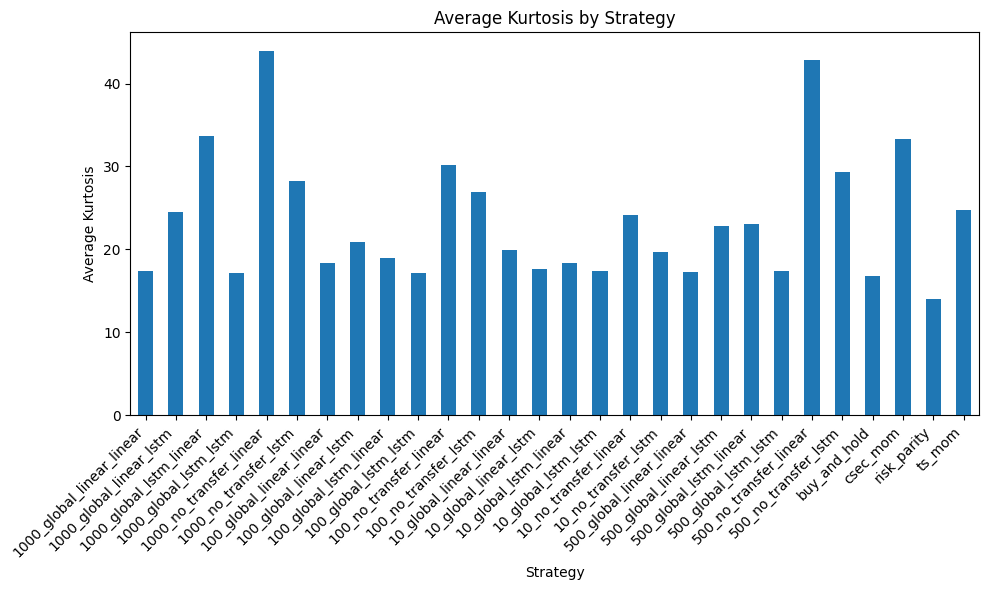

In [144]:
import matplotlib.pyplot as plt

metrics = [
    "average_sharpe_ratio",
    "average_calmar_ratio",
    "average_maximum_draw_down",
    "average_annual_return",
    "average_volatility",
    "average_sortino_ratio",
    "average_down_risk",
    "average_value_at_risk",
    "average_tail_risk",
    "average_skew",
    "average_kurtosis",
]

for metric in metrics:
    plt.figure(figsize=(10, 6))
    results_grouped[metric].plot(kind="bar")
    plt.title(f"{metric.replace('_', ' ').title()} by Strategy")
    plt.ylabel(metric.replace("_", " ").title())
    plt.xlabel("Strategy")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [145]:
results_grouped_rank = results_grouped.copy()
positive_rank_metrics = [
    "average_sharpe_ratio",
    "average_calmar_ratio",
    "average_annual_return",
    "average_sortino_ratio",
]

for metric in positive_rank_metrics:
    results_grouped_rank[metric] = results_grouped_rank[metric].rank(
        ascending=False, method="min"
    )

negative_rank_metrics = [
    "average_maximum_draw_down",
    "average_volatility",
    "average_down_risk",
    "average_value_at_risk",
    "average_tail_risk",
]

rank_metrics = positive_rank_metrics + negative_rank_metrics
for metric in negative_rank_metrics:
    results_grouped_rank[metric] = results_grouped_rank[metric].rank(
        ascending=True, method="min"
    )

results_grouped_rank = results_grouped_rank[rank_metrics]
results_grouped_rank


,average_sharpe_ratio,average_calmar_ratio,average_annual_return,average_sortino_ratio,average_maximum_draw_down,average_volatility,average_down_risk,average_value_at_risk,average_tail_risk
transferstrat,,,,,,,,,
1000_global_linear_linear,14.0,15.0,7.0,18.0,2.0,27.0,27.0,2.0,14.0
1000_global_linear_lstm,1.0,2.0,3.0,1.0,14.0,16.0,16.0,14.0,28.0
1000_global_lstm_linear,5.0,4.0,10.0,2.0,18.0,12.0,12.0,18.0,26.0
1000_global_lstm_lstm,12.0,17.0,13.0,16.0,11.0,18.0,19.0,12.0,15.0
1000_no_transfer_linear,19.0,9.0,24.0,13.0,25.0,4.0,4.0,25.0,19.0
1000_no_transfer_lstm,11.0,12.0,20.0,12.0,17.0,11.0,11.0,17.0,21.0
100_global_linear_linear,18.0,13.0,11.0,19.0,4.0,25.0,25.0,4.0,10.0
100_global_linear_lstm,8.0,8.0,5.0,8.0,7.0,22.0,22.0,8.0,20.0
100_global_lstm_linear,2.0,1.0,1.0,3.0,6.0,23.0,23.0,6.0,24.0


In [146]:
results_grouped_rank_total = results_grouped_rank.sum(axis=1)
results_grouped_rank_total

transferstrat
1000_global_linear_linear    126.0
1000_global_linear_lstm       95.0
1000_global_lstm_linear      107.0
1000_global_lstm_lstm        133.0
1000_no_transfer_linear      142.0
1000_no_transfer_lstm        132.0
100_global_linear_linear     129.0
100_global_linear_lstm       108.0
100_global_lstm_linear        89.0
100_global_lstm_lstm         129.0
100_no_transfer_linear       158.0
100_no_transfer_lstm         112.0
10_global_linear_linear      109.0
10_global_linear_lstm        140.0
10_global_lstm_linear        154.0
10_global_lstm_lstm          142.0
10_no_transfer_linear        170.0
10_no_transfer_lstm          160.0
500_global_linear_linear     121.0
500_global_linear_lstm       106.0
500_global_lstm_linear       100.0
500_global_lstm_lstm         126.0
500_no_transfer_linear       140.0
500_no_transfer_lstm         120.0
buy_and_hold                 129.0
csec_mom                     148.0
risk_parity                  167.0
ts_mom                       162.0
dtype:

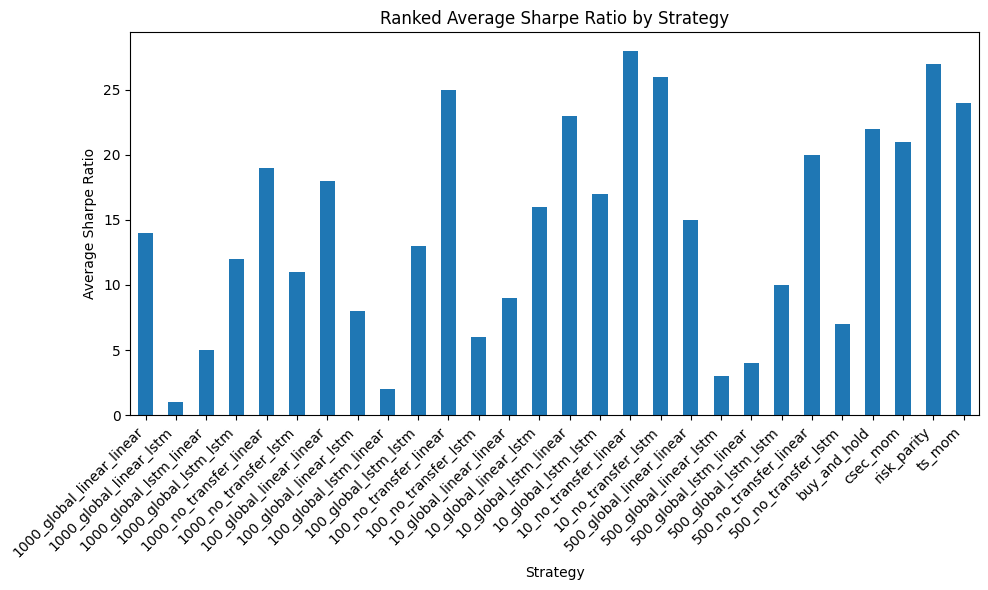

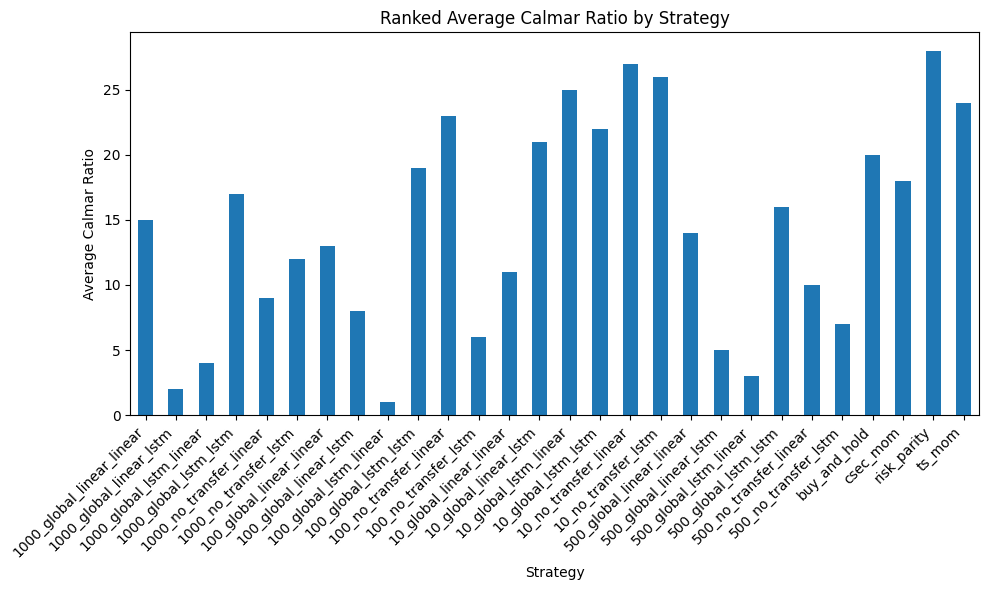

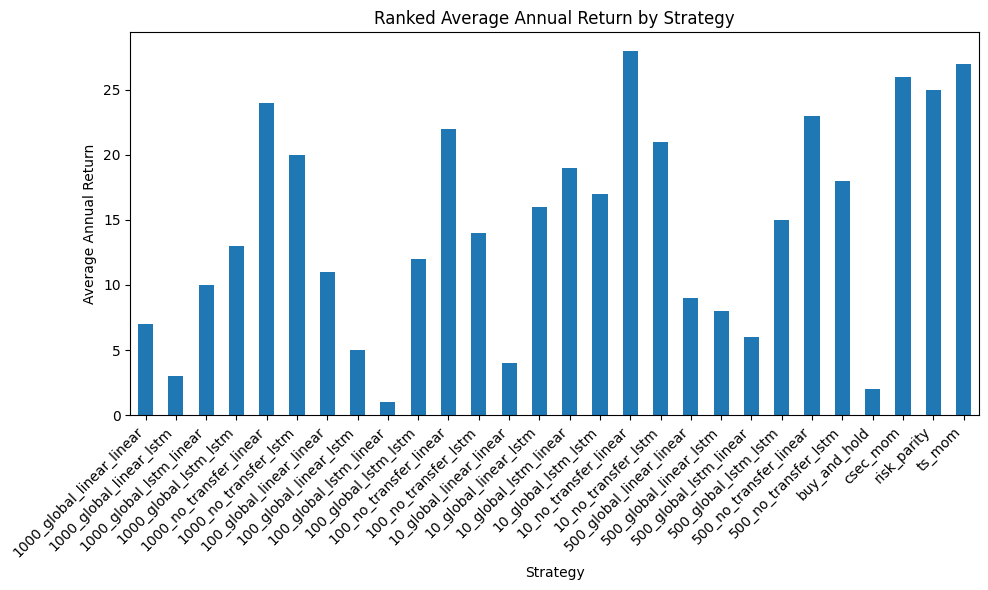

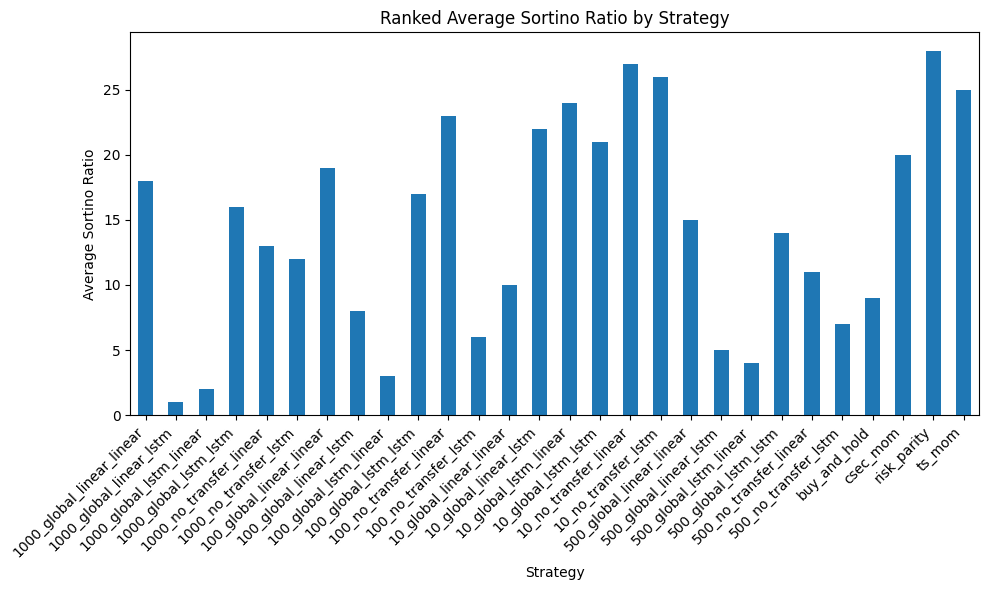

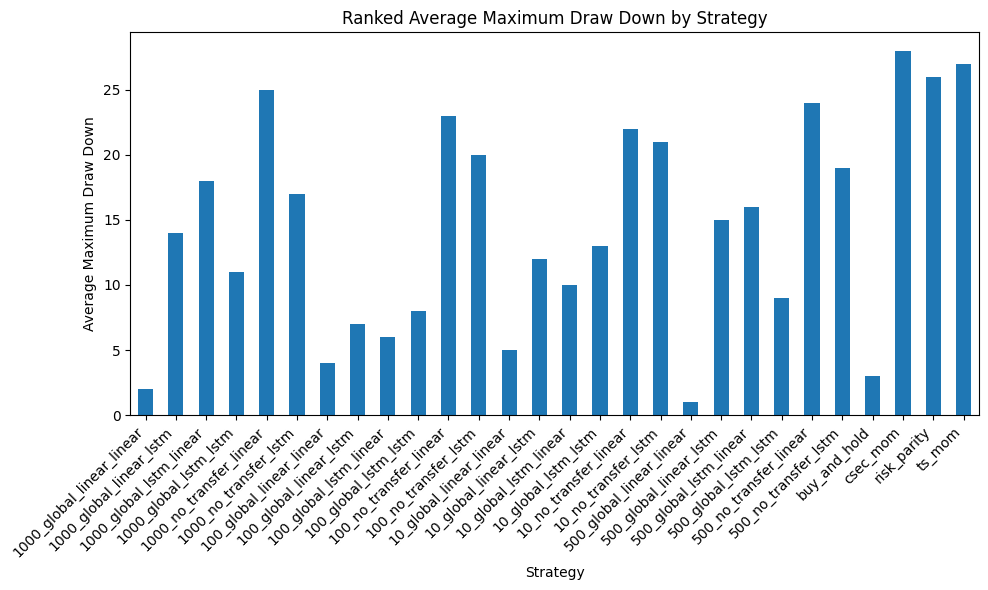

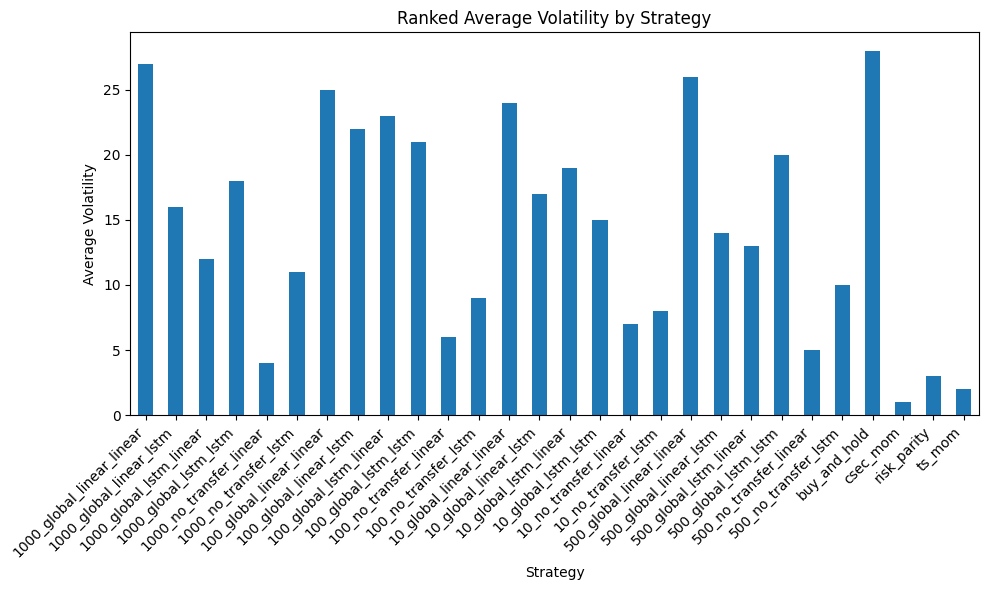

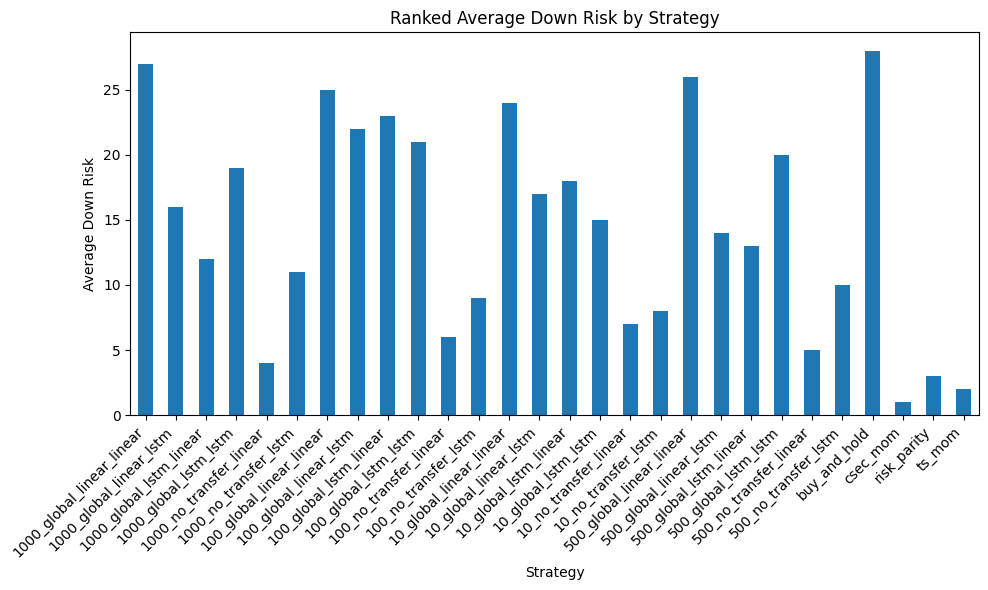

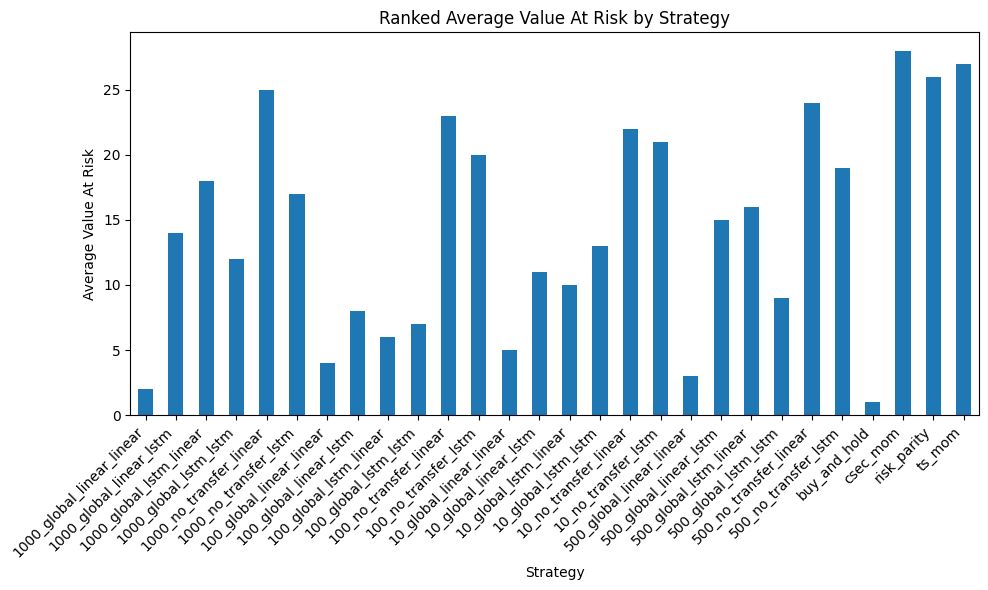

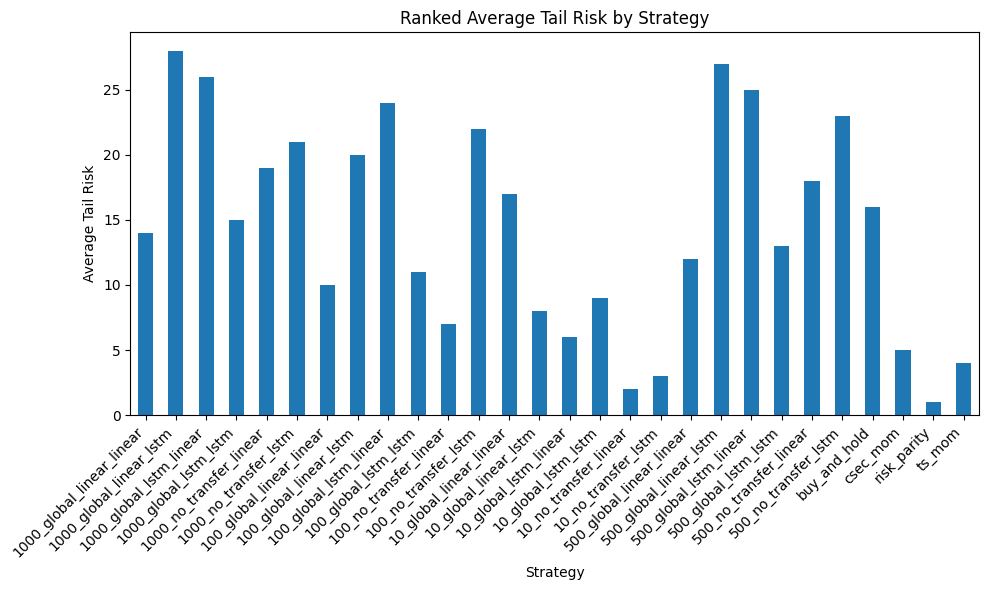

In [147]:
for metric in rank_metrics:
    plt.figure(figsize=(10, 6))
    results_grouped_rank[metric].plot(kind="bar")
    plt.title(f"Ranked {metric.replace('_', ' ').title()} by Strategy")
    plt.ylabel(metric.replace("_", " ").title())
    plt.xlabel("Strategy")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

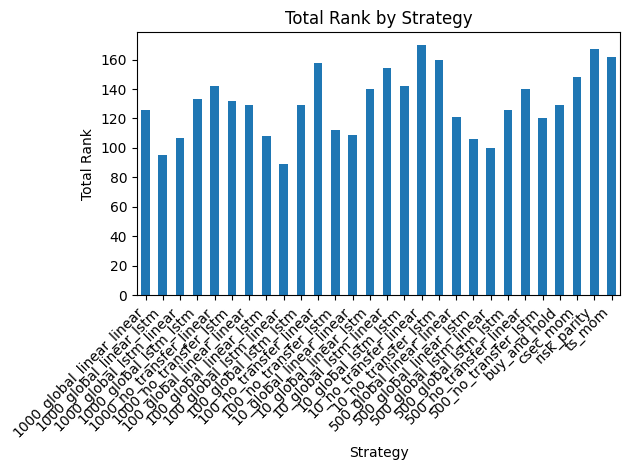

In [148]:
results_grouped_rank_total.plot(kind="bar")
plt.title("Total Rank by Strategy")
plt.ylabel("Total Rank")
plt.xlabel("Strategy")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()